<a href="https://colab.research.google.com/github/MangoHaha/MLFromScratch/blob/master/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install sklearn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import math
import sys

In [0]:
from google.colab import drive
drive.mount('/content/drive/My Drive')

In [0]:
import os
os.chdir('/content/drive/My Drive/MLFromScratch')
os.environ['PATH'] += "./utils"
from data_manipulation import make_diagonal, normalize, train_test_split
from data_operation import accuracy_score
from principal_component_analysis import PCA

In [0]:
def sigmoid(X):
  return 1/(1 + np.exp(-X))

[Log regression objective function
](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148)

[Derivative of cost function](https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression)

In [0]:
class LogisticRegression():
  def __init__(self, n_iter, learning_rate):
    self.n_iter = n_iter
    self.learning_rate = learning_rate
    
  def fit(self, X, y):
    X = np.insert(X, 0, 1, axis=1)
    num_features = np.shape(X)[1]
    self.w = np.random.random((num_features,))
    label = sigmoid(X.dot(self.w))
    for i in range(self.n_iter):
      self.w -= self.learning_rate*X.T.dot(label - y)

  
  def predict(self, X):
    y_pred = X.dot(self.w) 
    return np.round(sigmoid(y_pred)).astype(int)
  

(33, 4)
Accuracy: 0.5757575757575758


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


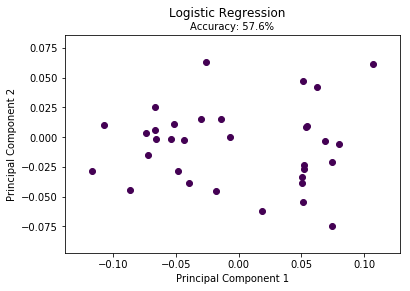

In [82]:
def main():
  data = datasets.load_iris()
  X, y = data.data[data.target != 0], data.target[data.target != 0]
  X = normalize(X)
  y[y==1] = 0
  y[y==2] = 1

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
  clf = LogisticRegression(4000, 0.1)
  clf.fit(X_train, y_train)
  print(np.shape(X_test))
  X_test = np.insert(X_test, 0, 1, axis=1)
  y_pred = clf.predict(X_test)
  
  accuracy = accuracy_score(y_test, y_pred)
  
  print ("Accuracy:", accuracy)

  # Reduce dimension to two using PCA and plot the results
  pca = PCA()
  pca.plot_in_2d(X_test, y_pred, title="Logistic Regression", accuracy=accuracy)

if __name__ == "__main__":
    main()